# PROBLEM STATEMENT
You are working with the government to transform your city into a smart city. The vision is to convert it into a digital and intelligent city to improve the efficiency of services for the citizens. One of the problems faced by the government is traffic. You are a data scientist working to manage the traffic of the city better and to provide input on infrastructure planning for the future.

The government wants to implement a robust traffic system for the city by being prepared for traffic peaks. They want to understand the traffic patterns of the four junctions of the city. Traffic patterns on holidays, as well as on various other occasions during the year, differ from normal working days. This is important to take into account for your forecasting. 

# Your task

To predict traffic patterns in each of these four junctions for the next 4 months.

The sensors on each of these junctions were collecting data at different times, hence you will see traffic data from different time periods. To add to the complexity, some of the junctions have provided limited or sparse data requiring thoughtfulness when creating future projections. Depending upon the historical data of 20 months, the government is looking to you to deliver accurate traffic projections for the coming four months. Your algorithm will become the foundation of a larger transformation to make your city smart and intelligent.

Variable||||	Description
---------------------------------
ID         |||   Unique ID

DateTime   |||  Hourly Datetime Variable

Junction   |||  Junction Type

Vehicles   |||  Number of Vehicles (Target)

# # Hypothesis Generation 
#  Hypothesis Generation is the process of listing out all the possible factors that can affect the outcome.
# Hypothesis generation is done before having a look at the data in order to avoid any bias that may result after the observation.
# It point outs the factors which might affect our dependent variable. Below are some of the hypotheses which I think can affect the Number of vehicles:


# 1.	There will be an increase in the traffic as the years pass by.
# •	 Population has a general upward trend with time, so we can expect more people will be passing by the  . Also, generally companies expand their businesses over time leading to more customers travelling through BulletTrain.

# 2.	Traffic on weekdays will be more as compared to weekends/holidays.
# •	 People will go to office on weekdays and hence the traffic will be more.
# 3.	Traffic during the peak hours will be high.
# • People will travel to work, college.
# We will try to validate each of these hypothesis based on the dataset. Now let’s have a look at the dataset.
# 


In [1]:
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:


# %% [code]
# Importing the train and test datasets


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# %% [code]
# Making copy of dataset

train_original=train.copy() 
test_original=test.copy()

# %% [code]
train_original.shape, test_original.shape

((48120, 4), (11808, 3))

# TAKING A LOOK AT THE DATA AVAILABLE

In [3]:
print(train_original.head())
print (test_original.head())


              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041
              DateTime  Junction           ID
0  2017-07-01 00:00:00         1  20170701001
1  2017-07-01 01:00:00         1  20170701011
2  2017-07-01 02:00:00         1  20170701021
3  2017-07-01 03:00:00         1  20170701031
4  2017-07-01 04:00:00         1  20170701041


In [4]:
train_original.ID.nunique(),train_original.shape

(48120, (48120, 4))

In [5]:
test_original.ID.nunique(),test_original.shape

(11808, (11808, 3))

In [6]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
DateTime    48120 non-null object
Junction    48120 non-null int64
Vehicles    48120 non-null int64
ID          48120 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
DateTime    11808 non-null object
Junction    11808 non-null int64
ID          11808 non-null int64
dtypes: int64(2), object(1)
memory usage: 276.8+ KB


(None, None)

# Feature Extraction/ENGINEERING

In [7]:
# 
# 
# First extract the time and date from the Datetime.
#It is seen earlier that the data type of Datetime is object. 
#So first of all, change the data type to datetime format otherwise we can not extract features from it.


import datetime 

train['DateTime'] = pd.to_datetime(train.DateTime,format='%d-%m-%Y %H:%M',infer_datetime_format=True) 
test['DateTime'] = pd.to_datetime(test.DateTime,format='%d-%m-%Y %H:%M', infer_datetime_format=True) 
test_original['DateTime'] = pd.to_datetime(test_original.DateTime,format='%d-%m-%Y %H:%M', infer_datetime_format=True) 
train_original['DateTime'] = pd.to_datetime(train_original.DateTime,format='%d %m %Y %H:%M',  infer_datetime_format=True)


train_original.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [8]:
for i in (train, test, test_original, train_original):
    i['year']=i.DateTime.dt.year 
    i['month']=i.DateTime.dt.month 
    i['day']=i.DateTime.dt.day
    i['Hour']=i.DateTime.dt.hour 
    i['quarter']=i.DateTime.dt.quarter
    i['dayofyear']=i.DateTime.dt.dayofyear 
    i['day of week']=i['DateTime'].dt.dayofweek 
    


# The hypothesis is drawn for the traffic pattern on weekday and weekend. 
#So, a weekend variable is generated to visualize the impact of weekend on traffic
#  First extract the day of week from Datetime and then based on the values we will assign whether the day is a weekend or not
# Values of 5 and 6 represents that the days are weekend.

In [9]:

test.shape,train.shape

((11808, 10), (48120, 11))

In [10]:
train['tag']='TRAIN'
test['tag']='TEST'
combined=pd.concat([train,test],sort=False)

In [11]:

# Assigning  1 if the day of week is a weekend and 0 if the day of week in not a weekend.

def MONDAY_BLUES(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
combined['weekend']= combined['DateTime'].apply(MONDAY_BLUES) 
# test['weekend']= test['DateTime'].apply(MONDAY_BLUES) 


def peak_hours(row):
    if row.hour >= 10 and row.hour <=23:
        return 1
    else:
        return 0
combined['peak_hr']= combined['DateTime'].apply(peak_hours) 
# test['peak_hr']= test['DateTime'].apply(peak_hours) 

In [12]:
combined.head()


,DateTime,Junction,Vehicles,ID,year,month,day,Hour,quarter,dayofyear,day of week,tag,weekend,peak_hr
0,2015-11-01 00:00:00,1,15.00,20151101001,2015,11,1,0,4,305,6,TRAIN,1,0
1,2015-11-01 01:00:00,1,13.00,20151101011,2015,11,1,1,4,305,6,TRAIN,1,0
2,2015-11-01 02:00:00,1,10.00,20151101021,2015,11,1,2,4,305,6,TRAIN,1,0
3,2015-11-01 03:00:00,1,7.00,20151101031,2015,11,1,3,4,305,6,TRAIN,1,0
4,2015-11-01 04:00:00,1,9.00,20151101041,2015,11,1,4,4,305,6,TRAIN,1,0


In [14]:
import holidays

holiday=[]
for date in holidays.India(years=[2015,2016,2017]).items():
    holiday.append(str(date[0]))



start_date=datetime.datetime(year=2015,month=1,day=1)
end_date=datetime.datetime(year=2017,month=12,day=31)
df=pd.DataFrame()
df['dates']=pd.date_range(start_date,end_date)
df.head()

,dates
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05


In [19]:
combined['Holiday_Tag']=[ 1 if str( val).split()[0] in holiday else 0 for val in combined['DateTime']]

In [22]:
combined['Junction']=combined.Junction.astype('str')
combined['ID']=combined.ID.astype('str')

In [49]:
train= combined[combined['tag']=='TRAIN']

test=combined[combined['tag']=='TEST']

In [50]:
train=train.drop('tag',axis=1)
test=test.drop('tag',axis=1)

In [51]:
train.shape,test.shape

((48120, 14), (11808, 14))

In [52]:
train.head()

,DateTime,Junction,Vehicles,ID,year,month,day,Hour,quarter,dayofyear,day of week,weekend,peak_hr,Holiday_Tag
0,2015-11-01 00:00:00,1,15.00,20151101001,2015,11,1,0,4,305,6,1,0,0
1,2015-11-01 01:00:00,1,13.00,20151101011,2015,11,1,1,4,305,6,1,0,0
2,2015-11-01 02:00:00,1,10.00,20151101021,2015,11,1,2,4,305,6,1,0,0
3,2015-11-01 03:00:00,1,7.00,20151101031,2015,11,1,3,4,305,6,1,0,0
4,2015-11-01 04:00:00,1,9.00,20151101041,2015,11,1,4,4,305,6,1,0,0


In [53]:
test.head()

,DateTime,Junction,Vehicles,ID,year,month,day,Hour,quarter,dayofyear,day of week,weekend,peak_hr,Holiday_Tag
0,2017-07-01 00:00:00,1,nan,20170701001,2017,7,1,0,3,182,5,1,0,0
1,2017-07-01 01:00:00,1,nan,20170701011,2017,7,1,1,3,182,5,1,0,0
2,2017-07-01 02:00:00,1,nan,20170701021,2017,7,1,2,3,182,5,1,0,0
3,2017-07-01 03:00:00,1,nan,20170701031,2017,7,1,3,3,182,5,1,0,0
4,2017-07-01 04:00:00,1,nan,20170701041,2017,7,1,4,3,182,5,1,0,0


# Exploratory Data Analysis

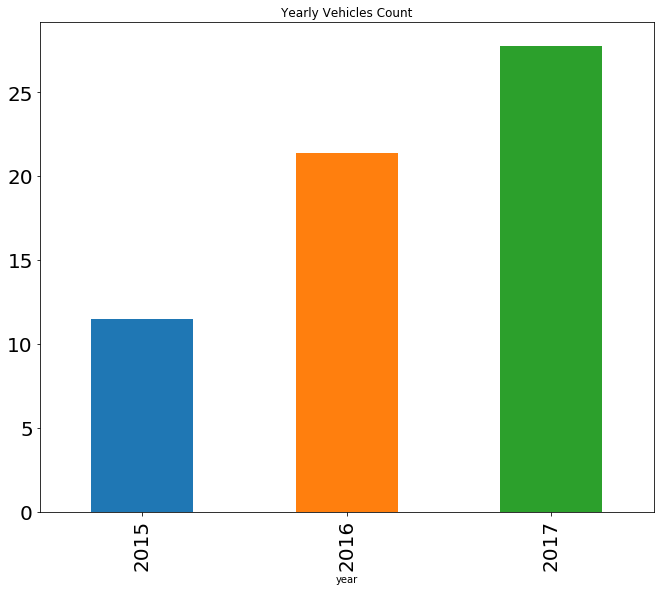

In [54]:
train.groupby('year')['Vehicles'].mean().plot.bar(fontsize=20,figsize=(11,9),title='Yearly Vehicles Count')

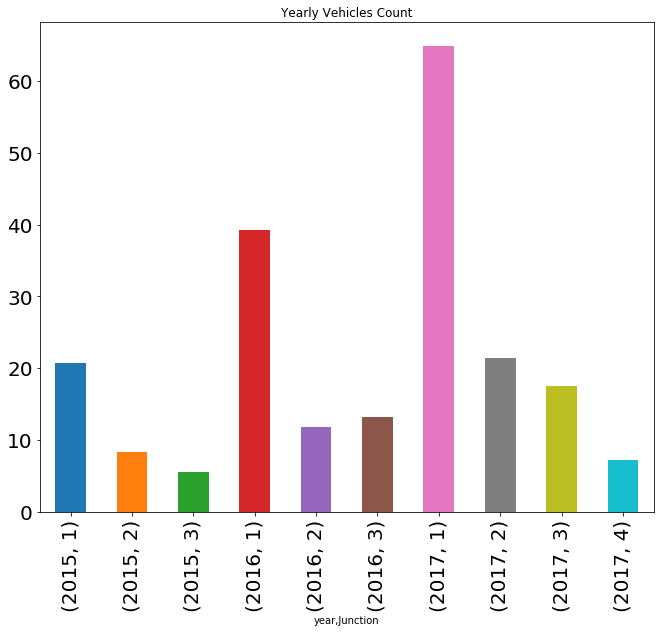

In [55]:
train.groupby(['year','Junction'])['Vehicles'].mean().plot.bar(fontsize=20,figsize=(11,9),title='Yearly Vehicles Count')

In [56]:
# We can see yearly growth in the number of vehicles every year, shows how increase in population affects the same.
#supports our hypothesis

#the second chart also shows that the Junction 1 encounters the maximum number of vehicles every year

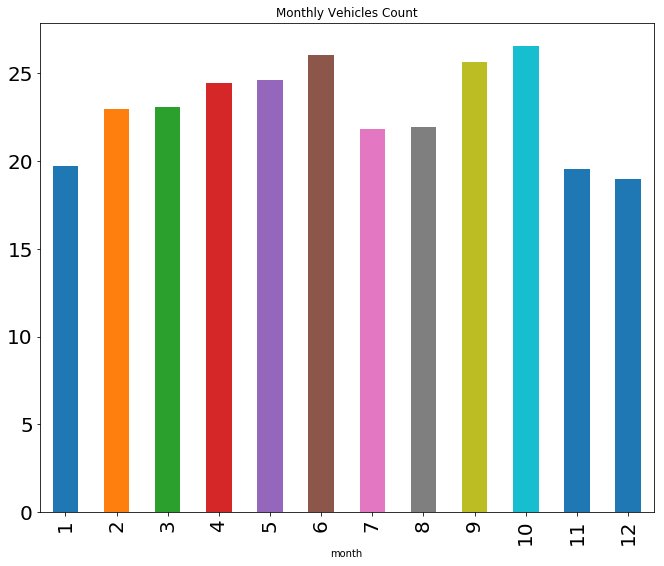

In [57]:
train.groupby('month')['Vehicles'].mean().plot.bar(fontsize=20,figsize=(11,9),title='Monthly Vehicles Count')

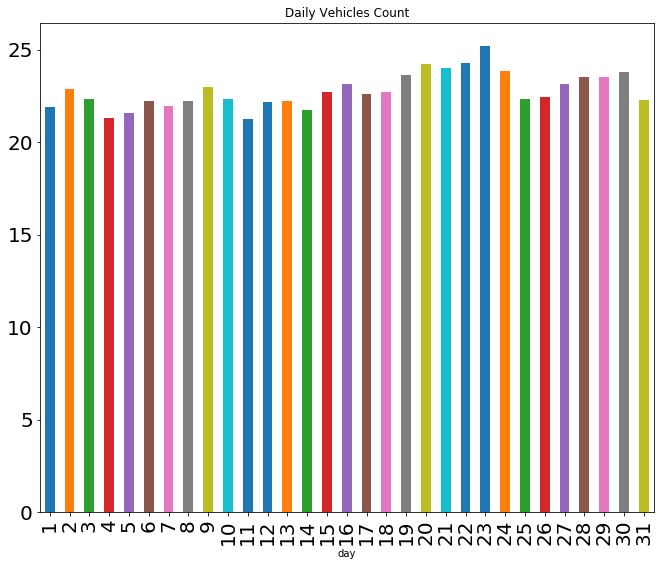

In [58]:
train.groupby('day')['Vehicles'].mean().plot.bar(fontsize=20,figsize=(11,9),title='Daily Vehicles Count')

In [59]:
# Monthly and daily doesn't give us any valuable insight to support our hypothesis

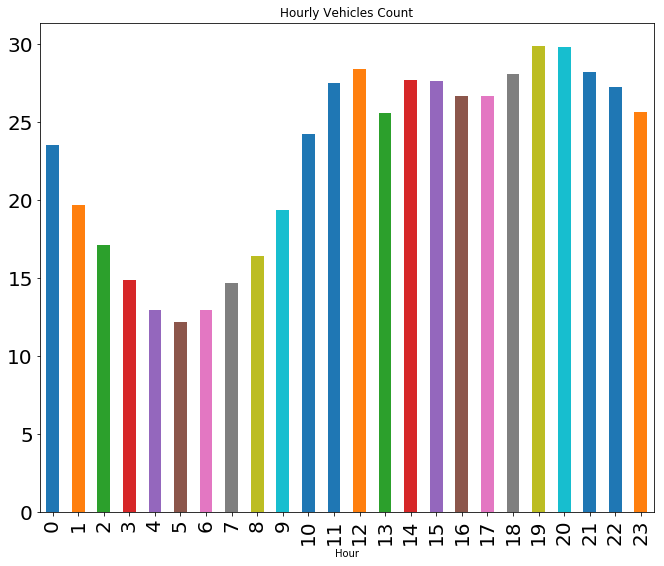

In [60]:
train.groupby('Hour')['Vehicles'].mean().plot.bar(fontsize=20,figsize=(11,9),title='Hourly Vehicles Count')

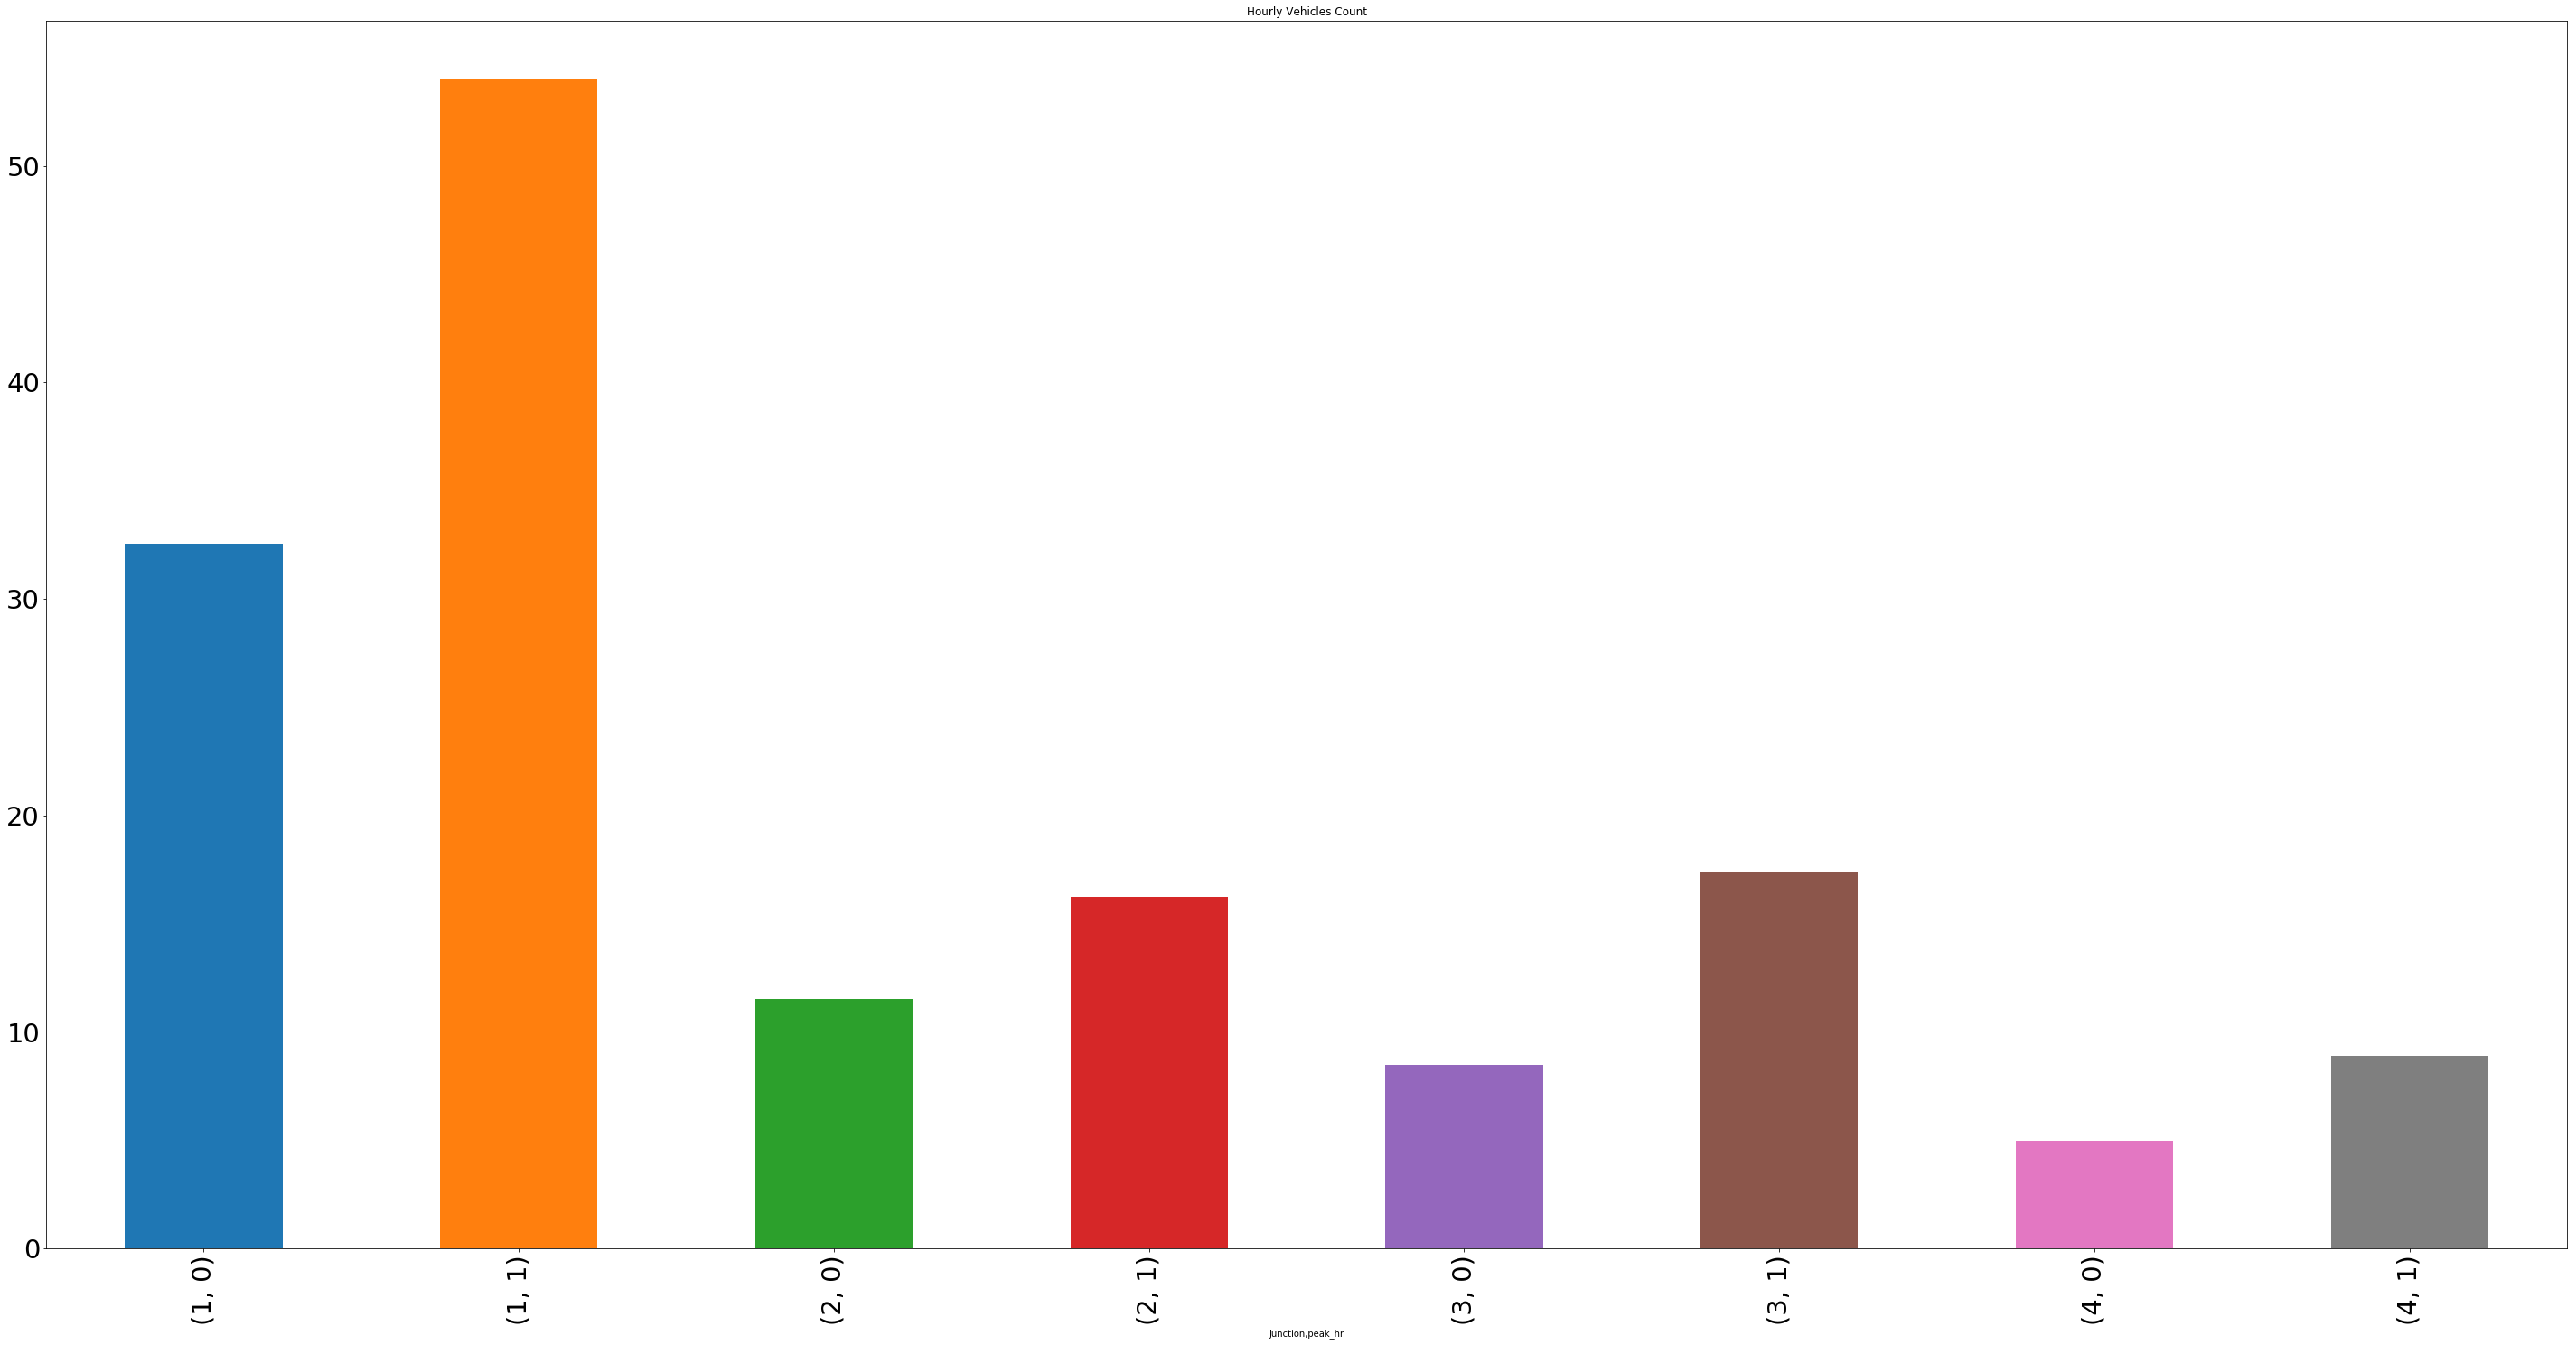

In [61]:
train.groupby(['Junction','peak_hr'])['Vehicles'].mean().plot.bar(fontsize=29,figsize=(50,25),title='Hourly Vehicles Count')

In [62]:
# vehicle count is at it's peak during  work hours-- supports our hypothesis

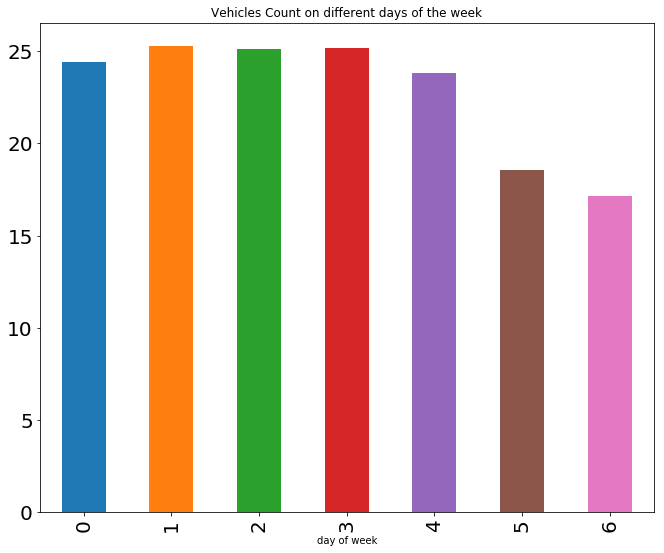

In [63]:
train.groupby('day of week')['Vehicles'].mean().plot.bar(fontsize=20,figsize=(11,9),title='Vehicles Count on different days of the week')

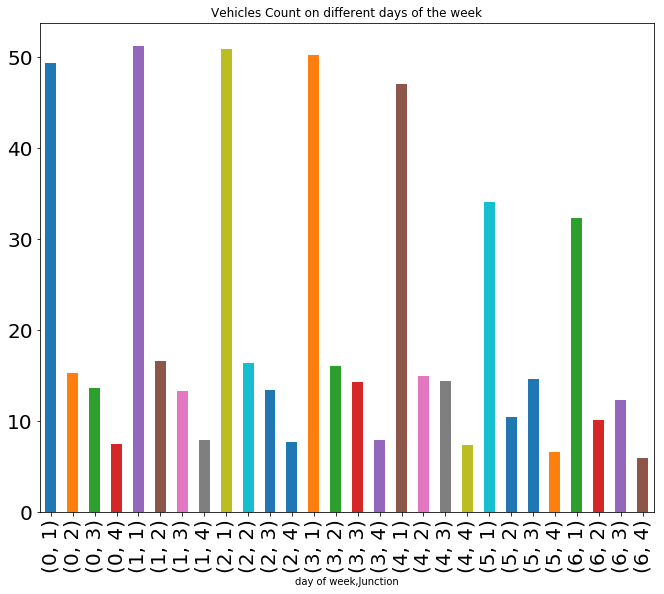

In [64]:
train.groupby(['day of week','Junction'])['Vehicles'].mean().plot.bar(fontsize=20,figsize=(11,9),title='Vehicles Count on different days of the week')

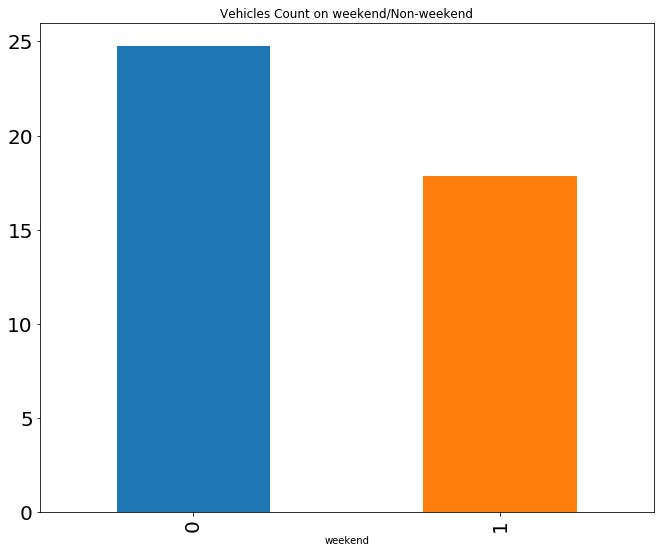

In [65]:
train.groupby('weekend')['Vehicles'].mean().plot.bar(fontsize=20,figsize=(11,9),title='Vehicles Count on weekend/Non-weekend')

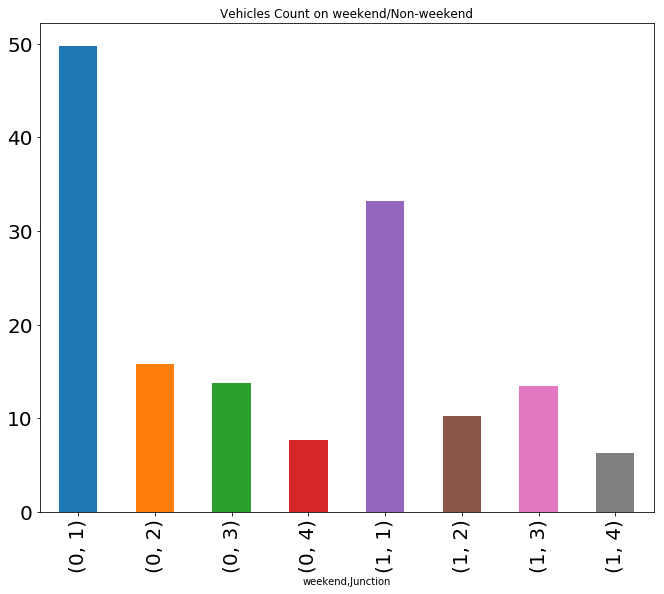

In [66]:
train.groupby(['weekend','Junction'])['Vehicles'].mean().plot.bar(fontsize=20,figsize=(11,9),title='Vehicles Count on weekend/Non-weekend')

In [67]:
train.groupby(['weekend','Junction'])['Vehicles'].mean()

weekend  Junction
0        1          49.77
         2          15.83
         3          13.79
         4           7.65
1        1          33.20
         2          10.28
         3          13.44
         4           6.24
Name: Vehicles, dtype: float64

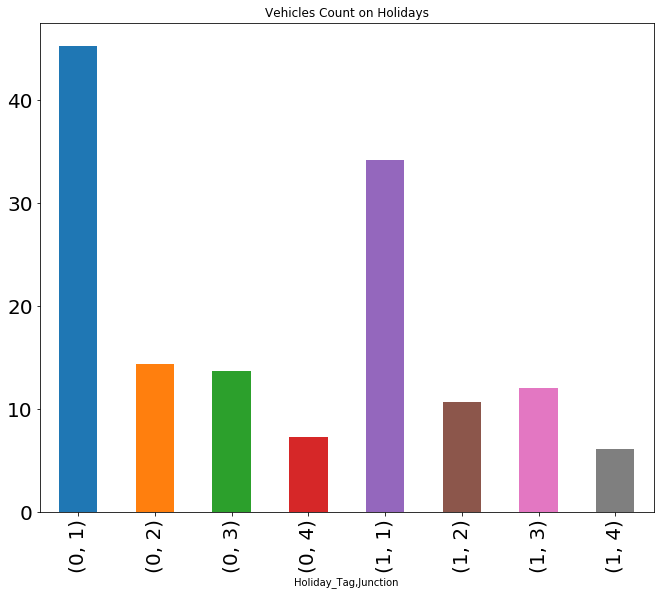

In [68]:
train.groupby(['Holiday_Tag','Junction'])['Vehicles'].mean().plot.bar(fontsize=20,figsize=(11,9),title='Vehicles Count on Holidays')

In [69]:
# Remember the weekend was tagged as 1 ?
# this supports as hypothesis of weekend having lesser number of vehicles count

# Junction 3 has similar count of vehicles even on a weekend, interesting?
# probably a place where essential commodities are spread.

In [70]:
train.index=pd.to_datetime(train.DateTime)
test.index=pd.to_datetime(test.DateTime)

In [71]:
train=train.drop('DateTime',1)
test=test.drop('DateTime',1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


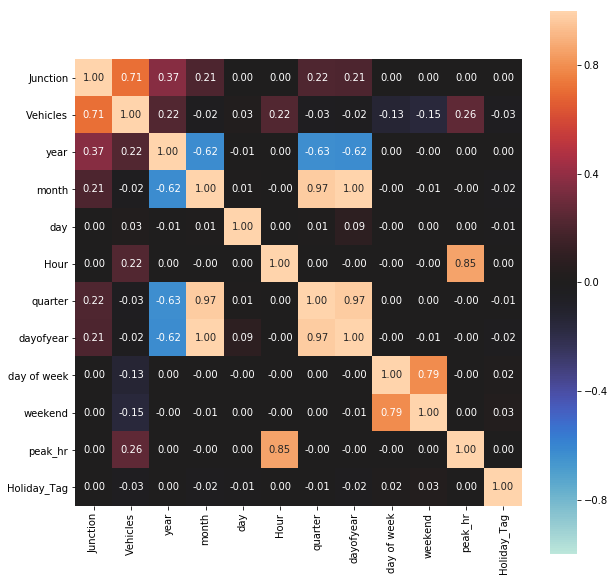

{'corr':              Junction  Vehicles  year  month   day  Hour  quarter  dayofyear  \
 Junction         1.00      0.71  0.37   0.21  0.00  0.00     0.22       0.21   
 Vehicles         0.71      1.00  0.22  -0.02  0.03  0.22    -0.03      -0.02   
 year             0.37      0.22  1.00  -0.62 -0.01  0.00    -0.63      -0.62   
 month            0.21     -0.02 -0.62   1.00  0.01 -0.00     0.97       1.00   
 day              0.00      0.03 -0.01   0.01  1.00  0.00     0.01       0.09   
 Hour             0.00      0.22  0.00  -0.00  0.00  1.00     0.00      -0.00   
 quarter          0.22     -0.03 -0.63   0.97  0.01  0.00     1.00       0.97   
 dayofyear        0.21     -0.02 -0.62   1.00  0.09 -0.00     0.97       1.00   
 day of week      0.00     -0.13  0.00  -0.00 -0.00 -0.00     0.00      -0.00   
 weekend          0.00     -0.15 -0.00  -0.01  0.00 -0.00     0.00      -0.01   
 peak_hr          0.00      0.26  0.00  -0.00  0.00  0.85    -0.00      -0.00   
 Holiday_Tag      0.

In [72]:
# Dython
# A set of Data analysis tools in pYTHON 3.x.

# Key features:

# Measures of association for categorical features
# Plot features correlation and association for mixed data-sets (categorical and continuous features) in an easy and simple way
# Plot ROC curves with AUC scores and estimated-optimal thresholds

nums = list(train.select_dtypes(exclude=['object']).columns)
from dython.nominal import associations

cat = [x for x in train.dtypes.index if train.dtypes[x]=='object']
cat = [x for x in cat if x not in ['ID']]
associations(train[(cat+nums)], theil_u=True, figsize=(10, 10))

In [73]:
combined.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID', 'year', 'month', 'day',
       'Hour', 'quarter', 'dayofyear', 'day of week', 'tag', 'weekend',
       'peak_hr', 'Holiday_Tag'],
      dtype='object')

In [74]:
TEMP_DATA=combined[[ 'Junction', 'Vehicles', 'ID', 'year', 'month', 'day',
       'Hour', 'quarter', 'dayofyear', 'day of week', 'tag', 'weekend',
       'peak_hr', 'Holiday_Tag']]

In [75]:
cat_vars=['Junction']
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[feature_to_encode],drop_first=True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop(feature_to_encode, axis=1)
    return(res)
OHE=encode_and_bind(TEMP_DATA,cat_vars)

In [76]:
OHE.head()

,Vehicles,ID,year,month,day,Hour,quarter,dayofyear,day of week,tag,weekend,peak_hr,Holiday_Tag,Junction_2,Junction_3,Junction_4
0,15.00,20151101001,2015,11,1,0,4,305,6,TRAIN,1,0,0,0,0,0
1,13.00,20151101011,2015,11,1,1,4,305,6,TRAIN,1,0,0,0,0,0
2,10.00,20151101021,2015,11,1,2,4,305,6,TRAIN,1,0,0,0,0,0
3,7.00,20151101031,2015,11,1,3,4,305,6,TRAIN,1,0,0,0,0,0
4,9.00,20151101041,2015,11,1,4,4,305,6,TRAIN,1,0,0,0,0,0


In [77]:
train=OHE[OHE['tag']=='TRAIN']
test=OHE[OHE['tag']=='TEST']
train=train.drop('tag',axis=1)
test=test.drop('tag',axis=1)

In [78]:
train.columns

Index(['Vehicles', 'ID', 'year', 'month', 'day', 'Hour', 'quarter',
       'dayofyear', 'day of week', 'weekend', 'peak_hr', 'Holiday_Tag',
       'Junction_2', 'Junction_3', 'Junction_4'],
      dtype='object')

In [79]:
# predictors=[ 'year', 'month', 'day', 'Hour', 'quarter',
#        'dayofyear', 'day of week', 'weekend', 'peak_hr', 'Junction_2',
#        'Junction_3', 'Junction_4']
predictors=[ 'year', 'month', 'day', 'Hour', 'quarter',
       'dayofyear', 'day of week', 'weekend', 'peak_hr', 'Holiday_Tag',
       'Junction_2', 'Junction_3', 'Junction_4']
# predictors=['Junction','weekend']
target='Vehicles'
IDcol= 'ID'

In [80]:
# Train=train.loc['2015-11-01':'2017-02-28'] 
# Valid=train.loc['2017-3-01':'2017-6-30'] 
# train_test_split(train[predictors], train[target], train_size=0.*,test_size=0.*, random_state=*)

from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(train[predictors], train[target], test_size = .20, random_state= 42)

# GRID SEARCH 

In this grid search I will try different combinations of RF hyperparameters.

Most important hyperparameters of Random Forest:

n_estimators = n of trees

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

In [81]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
# rf = RandomForestRegressor(n_estimators = 1000, random_state = 42,verbose=True,n_jobs=-1)
rf = RandomForestRegressor(n_jobs=-1)
# Train the model on training data
# rf.fit(train_X, train_Y);

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [83]:
#now let's see how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.625686046431256 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
5.54620924746624 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
5.246663516966532 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
5.1758757854165305 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
4.085363176146124 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
3.930754157331409 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
4.069904189737221 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
3.9535193665286643 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
4.096712857955246 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
3.953634641096912 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
4.088976702091416 {'bootstrap': True, 'max_depth': 

In [84]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [85]:
grid_search_forest.best_params_

{'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}

In [86]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(train_X)
errors = abs(grid_best - train_Y)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / train_Y))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 93.21 %


In [88]:
#RMSE
from sklearn.metrics import mean_squared_error
grid_mse = mean_squared_error(train_Y, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 1.51



# RANDOMIZED SEARCH

The grid search approach is often too costly, as many combinations are tested.
In these cases it is easier to use a randomized search, that evaluates  only a user defined number of random combinations for each hyperparameter at every iteration.
This way we could also test more hyperparameters

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10,15,20]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10, 15, 20],
 'n_estimators': [10, 257, 505, 752, 1000]}


In [90]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(train_X,train_Y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 26.0min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                  

In [91]:
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

3.972399917346423 {'n_estimators': 1000, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 23}
4.124634658456129 {'n_estimators': 505, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 23}
19.992195520394453 {'n_estimators': 1000, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
4.4165547744694456 {'n_estimators': 10, 'min_samples_split': 20, 'max_features': 'auto', 'max_depth': 23}
19.632828556100417 {'n_estimators': 257, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 1}
4.07397421092852 {'n_estimators': 1000, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
4.620592671587892 {'n_estimators': 752, 'min_samples_split': 15, 'max_features': 'sqrt', 'max_depth': 23}
19.99423515187154 {'n_estimators': 10, 'min_samples_split': 15, 'max_features': 'auto', 'max_depth': 1}
4.15854349971932 {'n_estimators': 10, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 23}
4.41789126229651 {'n_estimators': 505, 'min_samples_

In [92]:
# best random model 
rf_random.best_estimator_


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=23, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [93]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 23}

In [ ]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for i in max_depths:
    dt = RandomForestRegressor(max_depth=i)
    dt.fit(train_X, train_Y)    
    #compute accuracy for train data
    housing_tree = dt.predict(train_X)
    errors = abs(housing_tree - train_Y)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / train_Y)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    train_results.append(accuracy)
    
    #now again for test data
    housing_tree = dt.predict(test_X)
    errors = abs(housing_tree - test_Y)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / test_Y)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    test_results.append(accuracy)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test accuracy')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')

In [94]:
# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = predictors

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

    importance      feature
0         0.23   Junction_4
1         0.20   Junction_2
2         0.17         year
3         0.09         Hour
4         0.09    dayofyear
5         0.08   Junction_3
6         0.05      peak_hr
7         0.04  day of week
8         0.03      weekend
9         0.01          day
10        0.00        month
11        0.00  Holiday_Tag
12        0.00      quarter


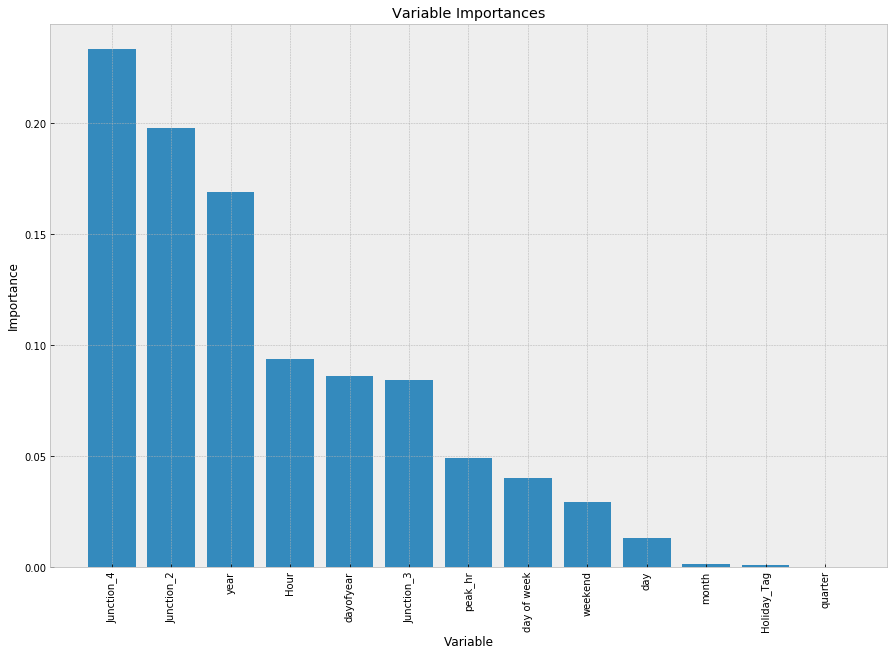

In [95]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [96]:

random_best= rf_random.best_estimator_.predict(test_X)
errors = abs(random_best - test_Y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
from sklearn.metrics import mean_squared_error

MSE=mean_squared_error(test_Y, random_best)
print('RMSE: ',np.sqrt(MSE))
predictions_test = rf_random.best_estimator_.predict(test[predictors])
submission=test[[IDcol]]
submission['Vehicles']=predictions_test

Mean Absolute Error: 2.36
RMSE:  3.6455470463721276


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [97]:
submission.to_csv("RF_Random_Search_Final.csv")

In [98]:

grid_best= grid_search_forest.best_estimator_.predict(test_X)
errors = abs(grid_best - test_Y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
from sklearn.metrics import mean_squared_error

MSE=mean_squared_error(test_Y, grid_best)
print('RMSE: ',np.sqrt(MSE))
predictions_test =grid_search_forest.best_estimator_.predict(test[predictors])
submission=test[[IDcol]]
submission['Vehicles']=predictions_test

Mean Absolute Error: 2.35
RMSE:  3.479345635538071


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [99]:
submission.to_csv("RF_GRID_Search_Final.csv")